### Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data=pd.read_csv('Food-Truck-LineReg.csv')
data

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
x=data['x'].values
y=data['y'].values

In [4]:
print(x)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [5]:
print(y)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


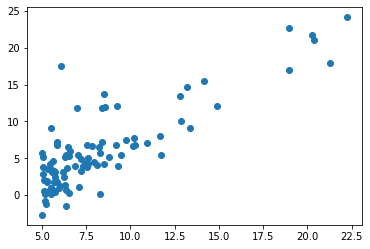

In [6]:
plt.scatter(x,y)

In [7]:
def mean(list):
    total=0
    for i in range(0,len(list)):
        total+=list[i]
    return (total/len(list))

In [8]:
x_val=data['x'].values
y_val=data['y'].values
x_mean=mean(x_val)
y_mean=mean(y_val)
print(x_mean,y_mean)

8.159800000000002 5.83913505154639


In [9]:
x2=0
y2=0
xy=0
x_val=data['x'].values

n = data['x'].count()
for i in range(n):
    x2=x2+(x[i]**2)
    y2=y2+(y[i]**2)
    xy=xy+(x[i]*y[i])
print(x2,y2,xy)   

7896.182453740001 6222.110372226397 6336.898425319003


In [10]:
def standard(list):
    n=mean(list)
    temp=0
    for i in list:
        temp=temp +((i-n)**2)
    sd=math.sqrt((temp/len(list)))
    return sd

In [11]:
r=(xy/((x2**(1/2))*(y2**(1/2))))
r

0.9040642647654091

In [12]:
std_x=standard(x_val)
std_y=standard(y_val)

In [13]:
m=(r*(std_y/std_x))
m

1.287281944934019

In [14]:
c=mean(y_val) - (m*mean(x_val))
c

-4.664828162726221

In [15]:
y_pred=[]
for i in range(n):
    y_pred.append((m*x[i])+c)
data['predicted']=y_pred
data


,x,y,predicted
0,6.1101,17.59200,3.200593
1,5.5277,9.13020,2.450880
2,8.5186,13.66200,6.301012
3,7.0032,11.85400,4.350265
4,5.8598,6.82330,2.878387
...,...,...,...
92,5.8707,7.20290,2.892418
93,5.3054,1.98690,2.164717
94,8.2934,0.14454,6.011116
95,13.3940,9.05510,12.577026


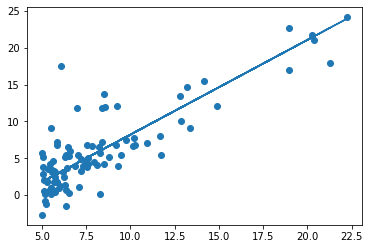

In [16]:
plt.plot(x,y_pred)
plt.scatter(x,y)

In [17]:
SST=0
SSR=0
SSE=0
MSE=0
for i in range(n):
    SST+=((y[i]-mean(y_val))**2)
    SSE+=((y[i]-y_pred[i])**2)
    SSR+=((y_pred[i]-mean(y_val))**2)
MSE=SST/n
cost=pow(MSE,(1/2))
R2=SSR/SST
print("SST:{}\n SSE:{}\n SSR:{} \nMSE:{}\n cost:{}\n R2: {}\n".format(SST,SSE,SSR,MSE,cost,R2))  

SST:2914.8470516572247
 SSE:881.3031285968033
 SSR:2382.3983383125683 
MSE:30.049969604713656
 cost:5.48178525707763
 R2: 0.8173321948258194

